In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import sys
sys.path.append('/Users/admin/Desktop/tesi/Thesis/')
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function
import import_ipynb
from handcrafted_descriptors.gabor_classification import utility as utility 


import pandas as pd
import os

importing Jupyter notebook from /Users/admin/Desktop/tesi/Thesis/handcrafted_descriptors/gabor_classification/utility.ipynb


In [2]:
species = ['Arthonia_radiata','Caloplaca_cerina','Candelariella_reflexa','Candelariella_xanthostigma','Chrysothrix_candelaris','Flavoparmelia_caperata','Gyalolechia_flavorubescens','Hyperphyscia_adglutinata'
        ,'Lecanora_argentata','Lecanora_chlarotera','Lecidella_elaeochroma','Melanelixia_glabratula'
        ,'Phaeophyscia_orbicularis','Physcia_biziana','Physconia_grisea','Ramalina_farinacea','Ramalina_fastigiata','Xanthomendoza_fallax','Xanthomendoza_fulva','flavoparmenia_soredians']


In [3]:
accuracy = []
precision = []
recall = []
f1score = []

In [ ]:
visual = '500'
precision = []
recall = []
accuracy = []
gridsize = ['4','6','8','12','16','24']


for i,gr in enumerate(gridsize):
    print('------> ',gr)
    trf = '../../../rgb_feat/rgb_' + gr +'_' + visual + '_rbf/training_features.mat'
    trlab = '../../../rgb_feat/rgb_' + gr +'_' + visual + '_rbf/training_lab_features.mat'

    tstf = '../../../rgb_feat/rgb_' + gr +'_' + visual + '_rbf/testing_features.mat'
    tstlab = '../../../rgb_feat/rgb_' + gr +'_' + visual + '_rbf/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1

    svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
    accuracy.append(score)
    name = "rbg_8_"+gr+'opponent_'
    direc = ""
    pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, gr,direc,name)
    
    a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'prova' + gr +'_')
    precision.append(a)
    recall.append(b)

In [ ]:
df = pd.DataFrame({"X":gridsize, "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('density of the grid (in pixel)')
plt.ylabel('Percentate %')
plt.tight_layout()
plt.savefig('results/grid_results/phow_500/total/acc_prec_rec.jpg')

# classic sift

------>  550
Best estimator found by grid search :  SVC(C=10.0, gamma=1)
Accuracy score : 0.5025
------>  600
Best estimator found by grid search :  SVC(C=10.0, gamma=1)
Accuracy score : 0.4775
------>  650
Best estimator found by grid search :  SVC(C=10.0, gamma=1)
Accuracy score : 0.5175


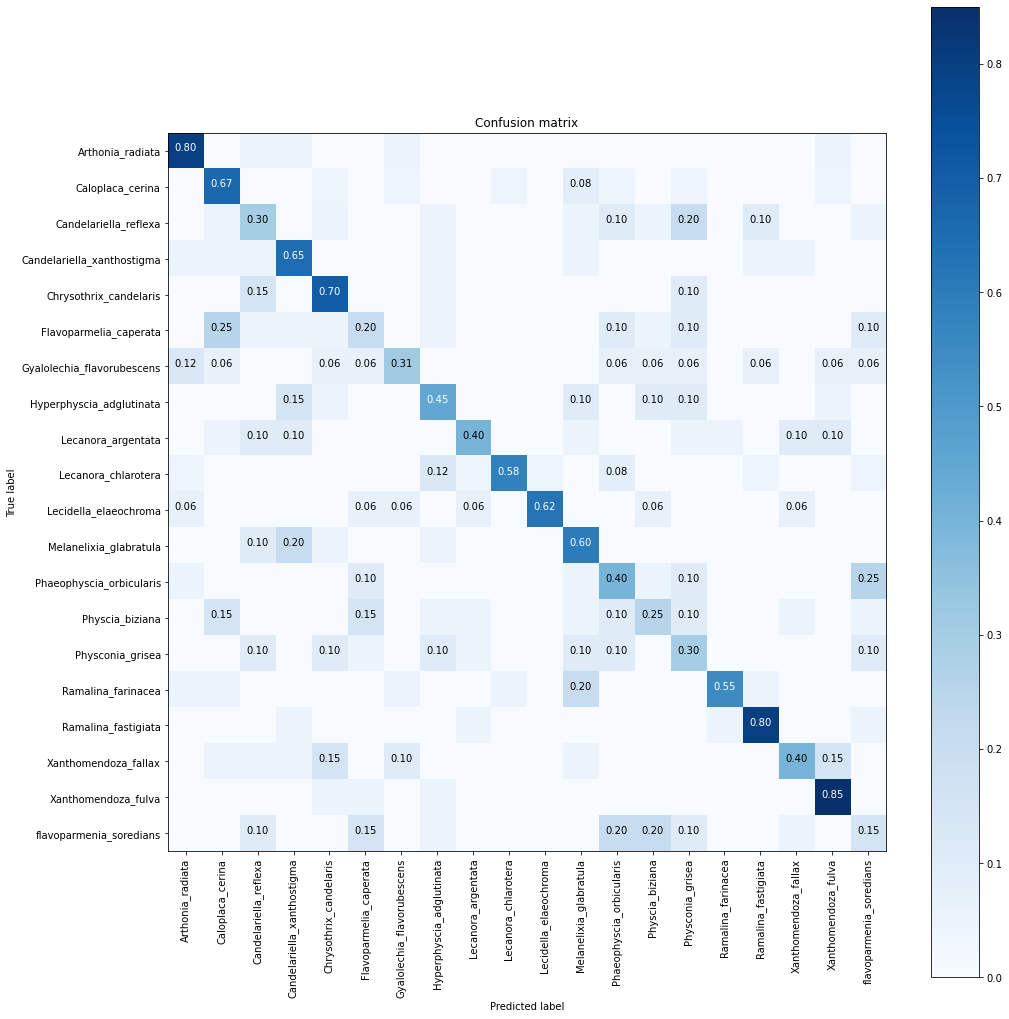

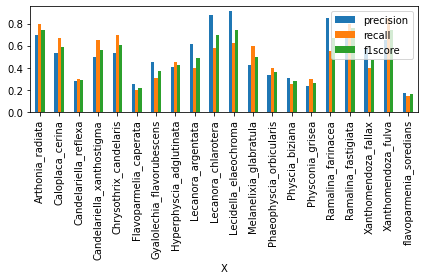

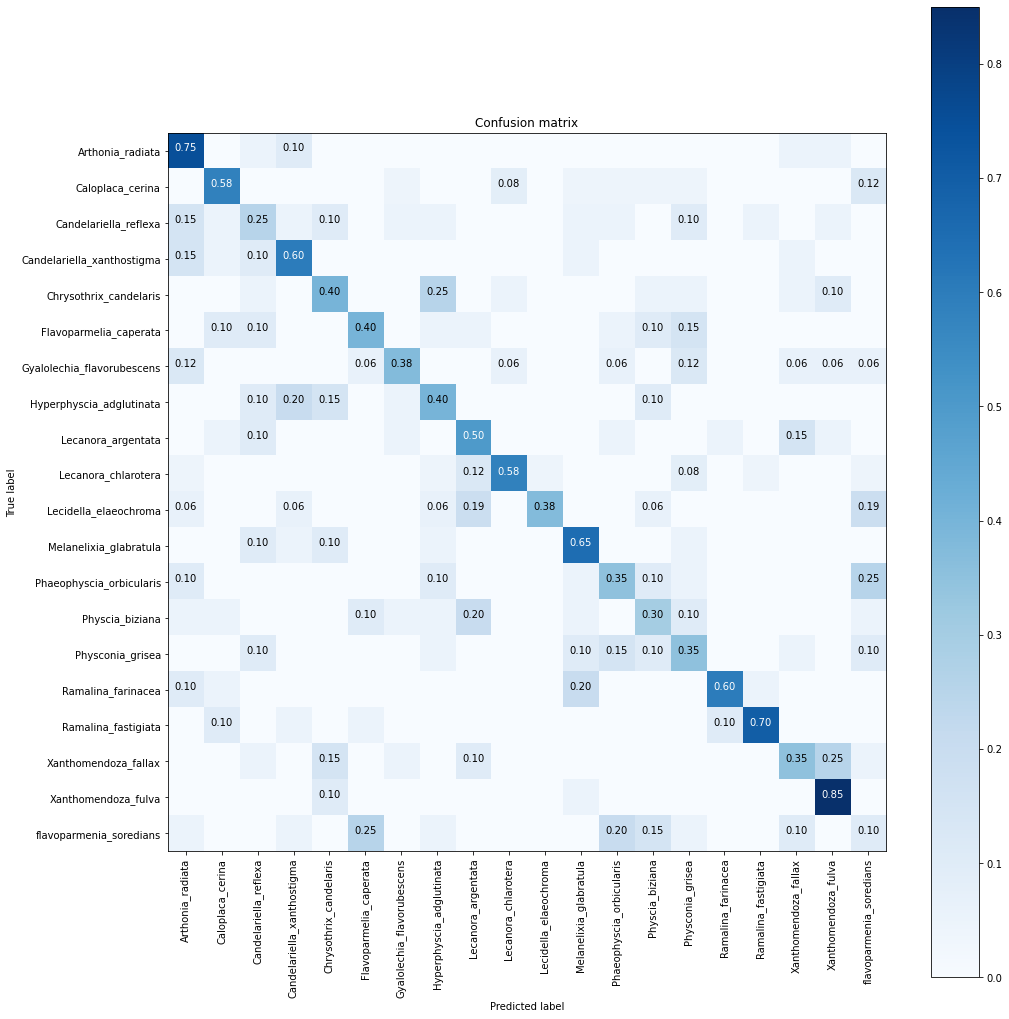

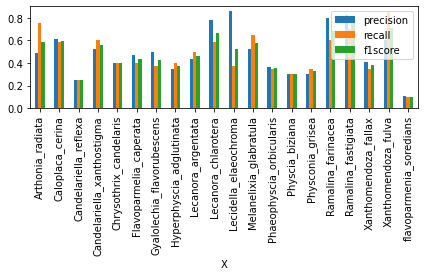

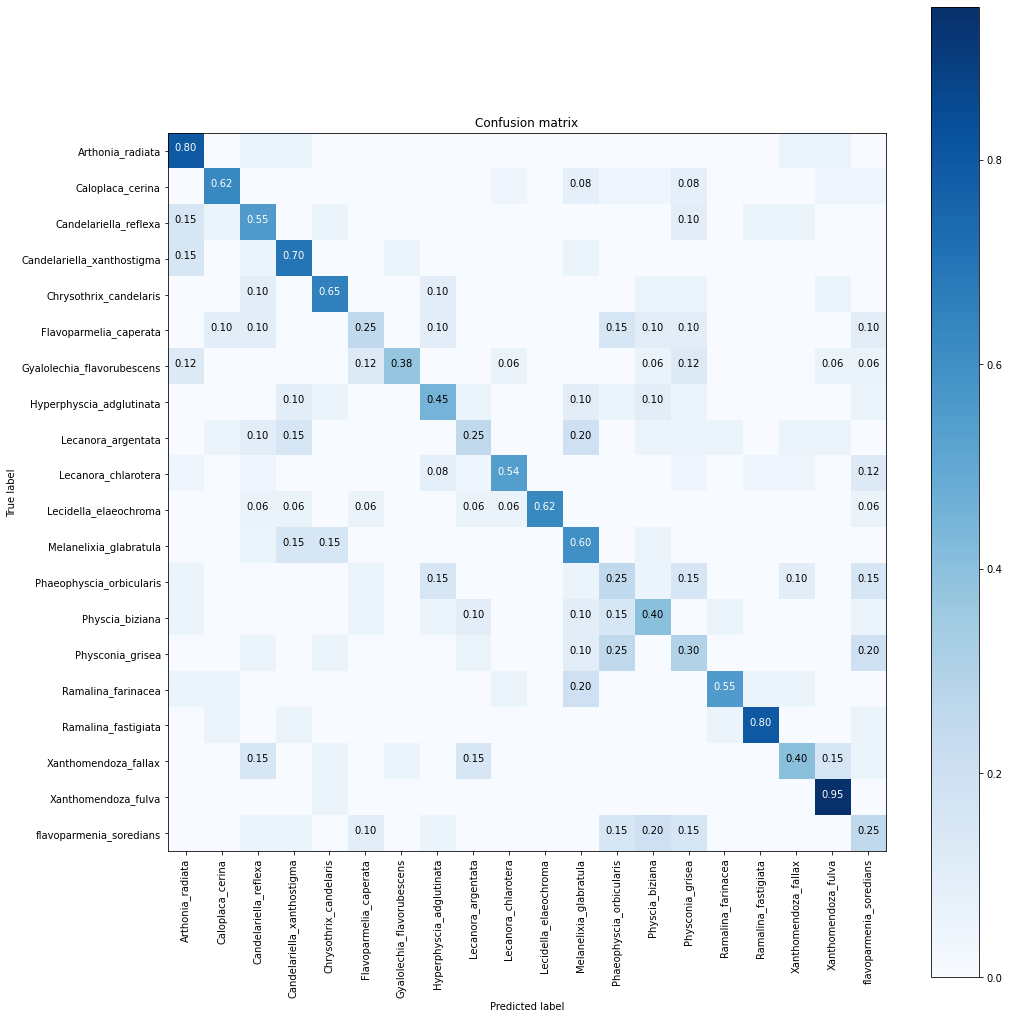

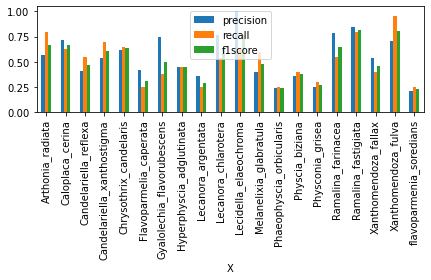

In [9]:

precision = []
recall = []
accuracy = []
visual = ['550','600','650']


for i,vs in enumerate(visual):
    print('------> ',vs)
    trf = '../../../classic_sift/features_for_python/classic_sift_' + vs +'/training_features.mat'
    trlab = '../../../classic_sift/features_for_python/classic_sift_' + vs +'/training_lab_features.mat'

    tstf = '../../../classic_sift/features_for_python/classic_sift_' + vs + '/testing_features.mat'
    tstlab = '../../../classic_sift/features_for_python/classic_sift_' + vs + '/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1

    #knnacc, knnprec, knnrec ,_ = utility.train_knn_model_and_calculate_accuracy(training_feat,tr_lab,tst_features,tst_lab)
    
    
    #classifier = KNeighborsClassifier(n_neighbors=1) 
    #classifier.fit(training_feat,tr_lab)
    name = "CS"+str(vs)
    direc = ""
    #pred = utility.create_and_save_confusion_matrix(classifier, tst_features, tst_lab, species, vs,'','knn_' + vs + '.jpg')
    
    
    
    #utility.plot_and_save_knn(knnacc, knnprec, knnrec,'classic_sift_knn_' + vs + '.jpg')
    
    svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
    accuracy.append(score)

    pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, vs,direc,name)
    
    a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'CS' + vs +'_')
    precision.append(a)
    recall.append(b)

In [ ]:
df = pd.DataFrame({"X":visual, "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('number of visualwords')
plt.ylabel('Percentate %')
plt.tight_layout()

# SPECIFIC CLASSIC SIFT MODEL

In [ ]:
vs = '650'
trf = '../../../features_for_python/classic_sift_' + vs +'/training_features.mat'
trlab = '../../../features_for_python/classic_sift_' + vs +'/training_lab_features.mat'

tstf = '../../../features_for_python/classic_sift_' + vs + '/testing_features.mat'
tstlab = '../../../features_for_python/classic_sift_' + vs + '/testing_lab_features.mat'

training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

tr_lab = tr_lab -1
tst_lab = tst_lab -1

svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
accuracy.append(score)
name = "classic_sift"
direc = ""
pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, vs,direc,name)
a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'pca_classic_sift' + vs +'_')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knnacc, knnprec, knnrec ,_ = utility.train_knn_model_and_calculate_accuracy(training_feat,tr_lab,tst_features,tst_lab)
    


In [ ]:
import matplotlib.pyplot as plt
x1 = np.arange(1,51)
plt.plot(x1, knnacc, label = "accuracy",color = 'r')
plt.plot(x1,knnprec, label = 'precision')
plt.plot(x1, knnrec, label = 'recall',color = 'g')
plt.xlabel('number of neighbors')
plt.ylabel('percentage (%)')
plt.legend()
plt.grid()
#plt.savefig('results/grid_results/k-nearest_neighbor_total.jpg')

In [ ]:

precision = []
recall = []
accuracy = []
visual = ['200','250','300','350','400','450','500','550','600','650','700','750','800','850','900']


for i,vs in enumerate(visual):
    print('------> ',vs)
    trf = '../../../features_for_python/classic_sift_' + vs +'/training_features.mat'
    trlab = '../../../features_for_python/classic_sift_' + vs +'/training_lab_features.mat'

    tstf = '../../../features_for_python/classic_sift_' + vs + '/testing_features.mat'
    tstlab = '../../../features_for_python/classic_sift_' + vs + '/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1

    knnacc, knnprec, knnrec ,_ = utility.train_knn_model_and_calculate_accuracy(training_feat,tr_lab,tst_features,tst_lab)
    
    classifier = KNeighborsClassifier(n_neighbors=1) 
    classifier.fit(training_feat,tr_lab)
    pred = utility.create_and_save_confusion_matrix(classifier, tst_features, tst_lab, species, vs,'','knn_' + vs + '.jpg')
    
    accuracy.append(knnacc[0])
    precision.append(knnprec[0])
    recall.append(knnrec[0])
    
    
    
    



In [ ]:
df = pd.DataFrame({"X":visual, "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('number of visualwords')
plt.ylabel('Percentate %')
plt.tight_layout()

## SCALE PROPAGATION 

In [ ]:
visual = '500'
precision_geom = []
recall_geom = []
accuracy_geom = []

precision_image = []
recall_image = []
accuracy_image = []

gridsize = ['4','6','8','12','16','32','64']


for gr in gridsize:
    print('------ ',gr,' --------- geom')
    trf = '../../../features_for_python/geom_500_' + gr + '/training_features.mat'
    trlab = '../../../features_for_python/geom_500_' + gr+ '/training_lab_features.mat'

    tstf = '../../../features_for_python/geom_500_' + gr + '/testing_features.mat'
    tstlab = '../../../features_for_python/geom_500_' + gr + '/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1  
    
    svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
    accuracy_geom.append(score)
    print(score)
    name = "scale_prop"
    direc = "results/scaleprop/"
    pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, gr,direc,name)
    a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'pca_scale_prop_sift' + gr +'_')
    
    precision_geom.append(a)
    recall_geom.append(b)


In [ ]:
df = pd.DataFrame({"X":gridsize, "precision":precision_geom,"recall":recall_geom,'accuracy': accuracy_geom})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('Gridsteps')
plt.ylabel('')
plt.tight_layout()

In [ ]:

precision_image = []
recall_image = []
accuracy_image = []

for gr in gridsize:
    print('------ ',gr,' --------- geom')
    trf = '../../../features_for_python/image_500_' + gr + '/training_features.mat'
    trlab = '../../../features_for_python/image_500_' + gr+ '/training_lab_features.mat'

    tstf = '../../../features_for_python/image_500_' + gr + '/testing_features.mat'
    tstlab = '../../../features_for_python/image_500_' + gr + '/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1  
    
    svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
    accuracy_image.append(score)
    print(score)
    name = "scale_prop_image"
    direc = "results/scaleprop/"
    pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, gr,direc,name)
    a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'pca_scale_prop_sift' + gr +'_')
    
    precision_image.append(a)
    recall_image.append(b)


In [ ]:
df = pd.DataFrame({"X":gridsize, "precision":precision_image,"recall":recall_image,'accuracy': accuracy_image})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('Gridsteps')
plt.ylabel('')
plt.tight_layout()

# DENSE SIFT WITH NO SCALE INVARIANCE

In [ ]:
precision = []
recall = []
accuracy = []
visual = ['400','450','500','550','600']


for i,vs in enumerate(visual):
    print('------> ',vs)
    trf = '../../../features_for_python/densesift_' + vs +'_4/training_features.mat'
    trlab = '../../../features_for_python/densesift_' + vs +'_4/training_lab_features.mat'

    tstf = '../../../features_for_python/densesift_' + vs +'_4/testing_features.mat'
    tstlab = '../../../features_for_python/densesift_' + vs +'_4/testing_lab_features.mat'


    training_feat,tr_lab = utility.load_descriptor_from_matfile(trf, trlab)
    tst_features, tst_lab = utility.load_descriptor_from_matfile(tstf,tstlab)

    tr_lab = tr_lab -1
    tst_lab = tst_lab -1

    #knnacc, knnprec, knnrec ,_ = utility.train_knn_model_and_calculate_accuracy(training_feat,tr_lab,tst_features,tst_lab)
    
    
    #classifier = KNeighborsClassifier(n_neighbors=1) 
    #classifier.fit(training_feat,tr_lab)
    name = "classic_sift"+str(vs)
    direc = "results/classic_sift/confusion_matrix/"
    #pred = utility.create_and_save_confusion_matrix(classifier, tst_features, tst_lab, species, vs,'','knn_' + vs + '.jpg')
    
    
    
    #utility.plot_and_save_knn(knnacc, knnprec, knnrec,'classic_sift_knn_' + vs + '.jpg')
    
    svm, score = utility.search_for_best_rbf(training_feat, tr_lab, tst_features, tst_lab)
    accuracy.append(score)

    pred = utility.create_and_save_confusion_matrix(svm, tst_features, tst_lab, species, vs,direc,name)
    
    a,b,c = utility.calculate_and_plot_precision_recall(tst_lab, pred, species, '', 'prova' + vs +'_')
    precision.append(a)
    recall.append(b)